# Cyber Security In Banking
## Credit Card Fraud Detection



Amita Mehta (0730478),    
Rajit (0730468),    
Jai Surya (0731608)

### Import Packages

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")



### Read the Train File

In [2]:
train_trans  = pd.read_csv('train_data.csv', index_col = 0, parse_dates = True)
train_id  = pd.read_csv('train_identity.csv', index_col = 0, parse_dates = True)

### Undestanding the data

In [3]:
train_trans.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,...,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,...,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579
std,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,...,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660
min,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,-83.000000
25%,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,...,0.000000,0.000000,0.958333,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,...,0.000000,0.000000,37.875000,0.666666,15.000000,43.000000,0.000000,0.000000,0.000000,52.000000
75%,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,...,40.000000,17.000000,187.958328,0.833333,197.000000,274.000000,13.000000,0.000000,2.000000,314.000000
max,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,...,873.000000,843.000000,1707.791626,0.958333,876.000000,670.000000,648.000000,847.000000,878.000000,879.000000


In [4]:
train_id.describe()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13
count,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000
mean,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146
std,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502
min,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000
25%,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000,49.000000,-360.000000
50%,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000,52.000000,-300.000000
75%,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000
max,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000


In [5]:
# Find the type has been inserted in the excel sheet
train_trans.dtypes

isFraud             int64
TransactionDT       int64
TransactionAmt    float64
productcd          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
v1                float64
v2                float64
v3                float64
v4                float64
v5                float64
v6                float64
v7                float64
v8                float64
v9                float64
v10               float64
v11               float64
v12               float64
v13               float64
v14               float64
v15               float64
v16               float64
                   ...   
c9                  int64
c10                 int64
c11                 int64
c12                 int64
c13                 int64
c14                 int64
d1                float64
d2          

In [6]:
# Find the type has been inserted in the excel sheet
train_id.dtypes

id_01           int64
id_02         float64
id_03         float64
id_04         float64
id_05         float64
id_06         float64
id_07         float64
id_08         float64
id_09         float64
id_10         float64
id_11         float64
id_12         float64
id_13         float64
DeviceType     object
DeviceInfo     object
dtype: object

In [7]:
train_trans.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'productcd', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'c1', 'c2',
       'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10',
       'd11', 'd12', 'd13', 'd14', 'd15', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6',
       'm7', 'm8', 'm9'],
      dtype='object')

In [8]:
train_trans.shape,train_id.shape

((590540, 80), (144233, 15))

### Cleaning and Pre-processing

In [9]:
def create_col_name(base_str, start_int, end_int):
    return [base_str +str(i) for i in range (start_int, end_int+1)]

In [10]:
create_col_name('card', 1, 6)

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [11]:
cat_cols = (['productcd']+ create_col_name('card',1,6) + ['addr1','addr2'] +
            create_col_name('m',1,9) + ['DeviceType', 'DeviceInfo'] + create_col_name('id_', 12,38))
id_cols = ['TransactionID', 'TransactionDT']

target = 'isFraud'

In [12]:
type_map = {c: str for c in cat_cols + id_cols}

##### Merging both the training data

In [13]:
train = train_trans.merge(train_id, on='TransactionID', how = 'left')

In [14]:
numeric_cols = [col for col in train.columns.tolist() if col not in cat_cols + id_cols + [target]]

In [15]:
assert(train.shape[0]==train_trans.shape[0])
train.head()

,isFraud,TransactionDT,TransactionAmt,productcd,card1,card2,card3,card4,card5,card6,...,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,-480.0,mobile,SAMSUNG SM-G892A Build/NRD90M


In [16]:
train[numeric_cols].head()

,TransactionAmt,dist1,dist2,v1,v2,v3,v4,v5,v6,v7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,68.5,19.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,59.0,287.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


### Load the Test Data

In [17]:
test_trans  = pd.read_csv('test_data.csv', index_col = 0, parse_dates = True)
test_id  = pd.read_csv('test_identity.csv', index_col = 0, parse_dates = True)

In [18]:
test = test_trans.merge(test_id, on='TransactionID', how = 'left')

In [19]:
test.head()

,TransactionDT,TransactionAmt,productcd,card1,card2,card3,card4,card5,card6,addr1,...,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribution Plot for Transaction amount and data time

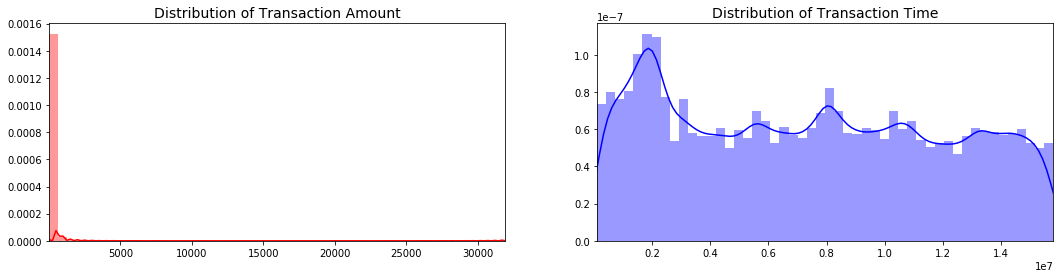

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = train['TransactionAmt'].values
time_val = train['TransactionDT'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Clean the numeric data

In [21]:
# Log Transfor
log_cols = ['TransactionAmt',
            'dist1',
            'dist2',
] + ['c%d' % i for i in range(1,15)]

non_log_cols = [c for c in numeric_cols if c not in log_cols]

In [22]:
for c in log_cols:
    train[c] = train[c].apply(lambda x: np.log10(x+1e-1))
    test[c] = test[c].apply(lambda x: np.log10(x+1e-1))

### Check Whether the data is balance or not

In [23]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(train['isFraud'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['isFraud'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset


Text(0.5, 1.0, 'Distribution of Credit Card Transactions')

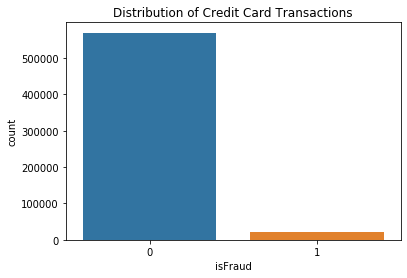

In [24]:
# Plot the histogram to whether the transaction 
colors = ["#0101DF", "#DF0101"]

sns.countplot(train['isFraud'])
plt.title('Distribution of Credit Card Transactions')

### Scaling

In [25]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

def standardize_numeric(train, test, cols):
    ss = StandardScaler()
    train[cols] = ss.fit_transform(train[cols])
    test[cols] = ss.fit_transform(test[cols])
    return train, test

In [26]:
train, test = standardize_numeric(train, test, non_log_cols+log_cols)

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(train['isFraud'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('Frauds', round(train['isFraud'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

X = train.drop('isFraud', axis=1)
y = train['isFraud']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset
Train: [116771 116772 116773 ... 590537 590538 590539] Test: [     0      1      2 ... 154476 154537 154538]
Train: [     0      1      2 ... 590537 590538 590539] Test: [116771 116772 116773 ... 253272 253306 253312]
Train: [     0      1      2 ... 590537 590538 590539] Test: [235448 235449 235450 ... 366784 366796 366821]
Train: [     0      1      2 ... 590537 590538 590539] Test: [353901 353902 353903 ... 472501 472502 472503]
Train: [     0      1      2 ... 472501 472502 472503] Test: [470273 470280 470286 ... 590537 590538 590539]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.96501084 0.03498916]
[0.9650066 0.0349934]


In [28]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

train = train.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_train = train.loc[train['isFraud'] == 1]
non_fraud_train = train.loc[train['isFraud'] == 0][:20663]

normal_distributed_train = pd.concat([fraud_train, non_fraud_train])

# Shuffle dataframe rows
new_train = normal_distributed_train.sample(frac=1, random_state=42)

new_train.head()


,isFraud,TransactionDT,TransactionAmt,productcd,card1,card2,card3,card4,card5,card6,...,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3264163,0,6734874,0.417143,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3180330,1,4334876,0.252411,R,5409,170.0,150.0,visa,226.0,credit,...,-0.139548,NaN,NaN,-0.092519,0.107952,0.225856,52.0,-300.0,desktop,Windows
3253565,1,6459144,-1.136021,C,1129,459.0,185.0,mastercard,224.0,credit,...,-1.534244,NaN,NaN,-0.092519,0.107952,0.225856,49.0,NaN,mobile,Blade A510 Build/MRA58K
3340002,0,8712370,1.131091,W,9480,170.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3226055,1,5634124,-2.092419,C,15063,NaN,150.0,visa,226.0,credit,...,-1.352327,NaN,NaN,NaN,NaN,0.225856,49.0,NaN,mobile,hi6210sft Build/MRA58K


Distribution of the Classes in the subsample dataset
1    0.03499
0    0.03499
Name: isFraud, dtype: float64


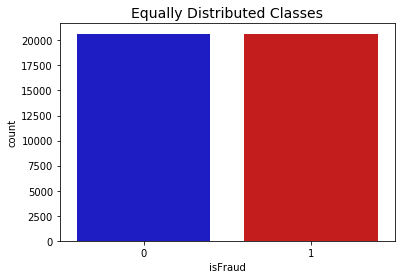

In [29]:
print('Distribution of the Classes in the subsample dataset')
print(new_train['isFraud'].value_counts()/len(train))



sns.countplot('isFraud', data=new_train, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### After Scaling Fill the null Values With mean

In [30]:
# Remove the unecessary column
new_train = new_train.drop(['productcd','card4','card6','m1','m2','m3','m4','m5','m6','m7','m8','m9','DeviceType','DeviceInfo'
],axis=1)
new_train.head()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13
TransactionID,,,,,,,,,,,,,,,,,,,,,
3264163,0,6734874,0.417143,16661,490.0,150.0,226.0,327.0,87.0,-0.666191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3180330,1,4334876,0.252411,5409,170.0,150.0,226.0,272.0,87.0,NaN,...,0.084076,-0.307740,-0.139548,NaN,NaN,-0.092519,0.107952,0.225856,52.0,-300.0
3253565,1,6459144,-1.136021,1129,459.0,185.0,224.0,NaN,NaN,NaN,...,0.084076,-1.450633,-1.534244,NaN,NaN,-0.092519,0.107952,0.225856,49.0,NaN
3340002,0,8712370,1.131091,9480,170.0,150.0,226.0,299.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3226055,1,5634124,-2.092419,15063,NaN,150.0,226.0,NaN,NaN,NaN,...,NaN,-1.641115,-1.352327,NaN,NaN,NaN,NaN,0.225856,49.0,NaN


In [31]:
new_train[non_log_cols+log_cols] = new_train[non_log_cols+log_cols].fillna(0)
test[non_log_cols+log_cols] = test[non_log_cols+log_cols].fillna(0)

In [32]:
new_train[log_cols+non_log_cols].head()

,TransactionAmt,dist1,dist2,c1,c2,c3,c4,c5,c6,c7,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
TransactionID,,,,,,,,,,,,,,,,,,,,,
3264163,0.417143,-0.666191,0.00000,-0.040332,0.290142,-0.063449,-0.512765,-0.667834,-0.236679,-0.329972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3180330,0.252411,0.000000,0.00000,1.624509,1.604770,-0.063449,1.948056,-0.667834,1.067403,-0.329972,...,3.829807,-0.100613,0.084076,-0.307740,-0.139548,0.0,0.0,-0.092519,0.107952,0.225856
3253565,-1.136021,0.000000,0.39183,3.930460,4.214168,-0.063449,4.543621,-0.667834,2.700287,6.141473,...,0.052743,-0.100613,0.084076,-1.450633,-1.534244,0.0,0.0,-0.092519,0.107952,0.225856
3340002,1.131091,0.000000,0.00000,-0.605667,-0.047863,-0.063449,-0.512765,-0.667834,-0.236679,-0.329972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3226055,-2.092419,0.000000,0.00000,-0.605667,-0.609052,-0.063449,1.425401,-0.667834,-0.236679,2.150602,...,-0.585611,0.000000,0.000000,-1.641115,-1.352327,0.0,0.0,0.000000,0.000000,0.225856


### Encoded Categories with Integer

In [33]:
plt.rcParams['figure.figsize'] = (8,8)
pd.set_option('display.max_columns', 500)

In [34]:
from pandas.api.types import CategoricalDtype
def cat_to_int(new_train, test, col):
    catDtype = CategoricalDtype(categories=new_train[col].value_counts().index.values)
    return new_train[col].astype(catDtype).cat.codes.values, test[col].astype(catDtype).cat.codes.values

In [35]:

def cat_to_int(new_train, test, col):
    catDtype = CategoricalDtype(categories=new_train[col].value_counts().index.values)
    return (new_train[col].astype(catDtype).cat.codes.values+1,
            test[col].astype(catDtype).cat.codes.values+1)

### Modeling

In [36]:

df = new_train['isFraud'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(41326, 1)


array([[0],
       [1],
       [1],
       [0],
       [1]], dtype=int64)

In [37]:
# Divide the data set into train and test

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])

In [38]:
# Rows and Columns
dataset_train.shape

(33060, 1)

In [39]:
dataset_test.shape

(8316, 1)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [41]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [42]:
#Create one continuous series

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [43]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
        0., 1.]])

In [44]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
        0., 0.]])

In [45]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Build LSTM

In [46]:
#Import all deep learing learning library to create LSTM model
import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.python.keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [47]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
#and an output layer that makes a single value prediction. 
#The default sigmoid activation function is used for the LSTM blocks. 
#The network is trained for 15 epochs and a batch size of 32 is used.


model = Sequential()
#We add the LSTM layer with the following arguments:
#100 units which is the dimensionality of the output space
#return_sequences=True which determines whether to return the last output in the output sequence,
#or the full sequence
#input_shape as the shape of our training set.
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))

#We add the LSTM layer and later add a few Dropout layers to prevent overfitting. 

model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [48]:
# epochs — This is the number of iterations (forward and back propagation) our model needs to make.

model.compile(loss='mean_squared_error', optimizer='RMsprop')

In [49]:
#Fit the model

model.fit(x_train, y_train, epochs=15, batch_size=32)

Train on 33010 samples
Epoch 1/15
33010/33010 [==============================] - 1425s 43ms/sample - loss: 0.2580
Epoch 2/15
33010/33010 [==============================] - 1215s 37ms/sample - loss: 0.2522
Epoch 3/15
33010/33010 [==============================] - 1261s 38ms/sample - loss: 0.2516
Epoch 4/15
33010/33010 [==============================] - 767s 23ms/sample - loss: 0.2516
Epoch 5/15
33010/33010 [==============================] - 1268s 38ms/sample - loss: 0.2511
Epoch 6/15
33010/33010 [==============================] - 1318s 40ms/sample - loss: 0.2510
Epoch 7/15
33010/33010 [==============================] - 1233s 37ms/sample - loss: 0.2509
Epoch 8/15
33010/33010 [==============================] - 820s 25ms/sample - loss: 0.2509
Epoch 9/15
33010/33010 [==============================] - 529s 16ms/sample - loss: 0.2509
Epoch 10/15
33010/33010 [==============================] - 527s 16ms/sample - loss: 0.2506
Epoch 11/15
33010/33010 [==============================] - 589s 18ms/s

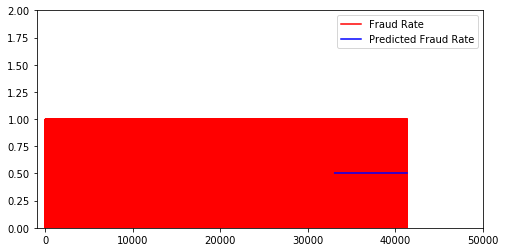

In [50]:
#Data visualization 

predictions = model.predict(x_test)
#use inverse_transform to get back the stock prices in normal readable format.
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="Fraud Rate")
plt.ylim(0,2)
plt.xlim(-1000,50000)
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Fraud Rate')
plt.legend()

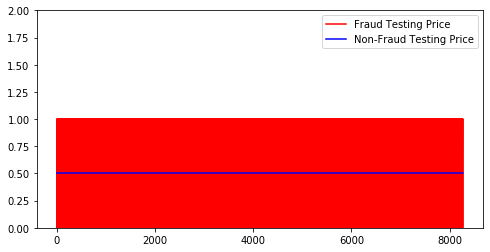

In [51]:
#Test (unseen data) output vs. prective output visualization

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='Fraud Testing Price')
plt.plot(predictions, color='blue', label='Non-Fraud Testing Price')
plt.ylim(0,2)
plt.legend()

In [52]:
x = x_test[-1]
num_timesteps = 10
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[0.50414973, 0.50415087, 0.5041518, 0.5041511, 0.5041487, 0.50414646, 0.50414497, 0.50414425, 0.5041441, 0.5041441]
